### **Background and Objective**
High school is an important part of the education system in many countries because it helps students acquire knowledge and skills needed for higher education and workplace and prepare them to face new challenges.

A school with a good reputation and many high-achieving students will attract attention from parents enrolling their children in the school, donors, the government, and other institutions that want to support the school. This can increase the funds available to schools, increasing school profits.

Objective: Identify factors that impact student performance on exam

https://www.kaggle.com/datasets/devansodariya/student-performance-data

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
df = pd.read_csv('student_data.csv')

# Data Cleansing

## General Info & Missing Values

In [ ]:
pd.set_option('max_columns', None)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


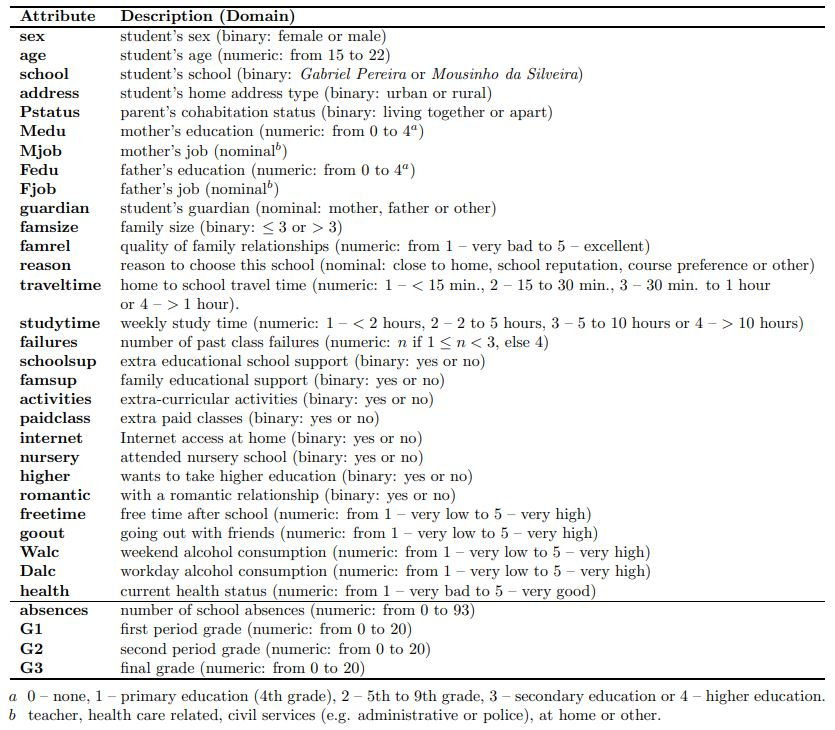

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     0 non-null      object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
# number of missing values per column
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

In [ ]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

* The dataset has 33 columns and 395 rows
* There are 17 categorical features and 16 numerical features
* There are no missing and no duplicate values

# Data Understanding

## Statistical Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
categoricals = ['school',	'sex', 'address',	'famsize',	'Pstatus', 'Mjob',	'Fjob',	'reason',	'guardian', 'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic']

numericals = ['age', 'Medu',	'Fedu', 'traveltime',	'studytime',	'failures', 'famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',	'G1',	'G2',	'G3']

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


1. The mean and median values range not too far
2. Age of high school students between 15 - 22 years
3. The average - parents of high school graduates
4. Minimum travel time to school < 15 minutes and maximum > 1 hour
5. The average students study time are 2 -5 hours
6. The average students rarely fail the previous exam
7. The average students have a good family relationship
8. The average students have free time after school
9. The average students like traveling with friends
10. The average student consume very little alcohol on weekdays but consume more on weekends
11. The average students are in good health
12. The average students absences are 6 days and a maximum of 75 days
13. The scores for each grade tend to be stagnant



In [ ]:
# describe method on categorical data
df[categoricals].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [ ]:
print(df['Mjob'].value_counts())

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


In [ ]:
print(df['Fjob'].value_counts())

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


1. Students are from schools 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira
2. There are more female students than male students.
3. There are more students who live in the city
4. There are more students who have family members > 3
5. There are more parents who live in the same house
6. There are more parents' occupation 'Other' and 'Civil Services'
7. Reason for choosing the school is the curriculum
8. Student's guardian is usually the mother
9. There are more students who do not join extra classes
10. There are more parents who still teach their children
11. There are more students who take courses and extracurricular activities
12. There are more students who graduate from kindergarten
13. There are more students who are interested in studying at a higher level.
14. There are more students who have internet access at home
15. There are more students who are not dating

# Univariate Analysis

In [ ]:
def ncols_calculator(cols,nrows=3):
    '''
    Takes a list of columns and numbers row plots
    
    returns number of cols to be used in matplotlib.pyplot.subplots()
    and how many axes will be remained that need to be deleted
    '''
    n = len(cols)
    ncols = n//nrows
    if ncols*nrows < n:
        ncols+=1
    axdel = ncols*nrows-n
    return ncols,axdel
    
def bar_chart(df,cols,nrows=3,annot=True,title='Title'):
    '''
    df --> DataFrame
    cols --> List of Columns name to be plotted
    nrows --> number of nrows to split figure subplots default is 3
    annot --> Boolean to decide whether percentage of each bar annotation is desired
    title --> Figure title to be displayed
    
    Functions is designed to create one plot using
    sns.countplot for catagorical datatype columns
    
    '''
    ncols,axdel = ncols_calculator(cols)
    fig,axes = plt.subplots(ncols,nrows,figsize=(nrows*4,ncols*3),constrained_layout=True)
    plt.suptitle(f'{title}',size=20, fontweight='bold', fontfamily='serif')
    axes=axes.ravel()
    if axdel >0:
        for ax in range(1,axdel+1):
            axes[-ax].remove()
    for i in range(len(cols)):
        #creating plotting data information
        ax = axes[i]
        col = cols[i]
        #creating plot
        sns.countplot(x=col,data=df,color=sns.color_palette()[0],ax=ax)
        #adjusting plot
        ax.set_xlabel("")
        ax.set_title(col+'_Column')
        ax.set_ylim(0,max(ax.get_ylim())+max(ax.get_ylim())/8)
        #writing percentage over each bar
        if annot==True:
            for p in ax.patches:
                x = p.get_x()+0.2
                y = p.get_height()+1
                percentage = '{:.1f}%'.format(100*p.get_height()/df.shape[0])
                ax.annotate(percentage,(x,y))


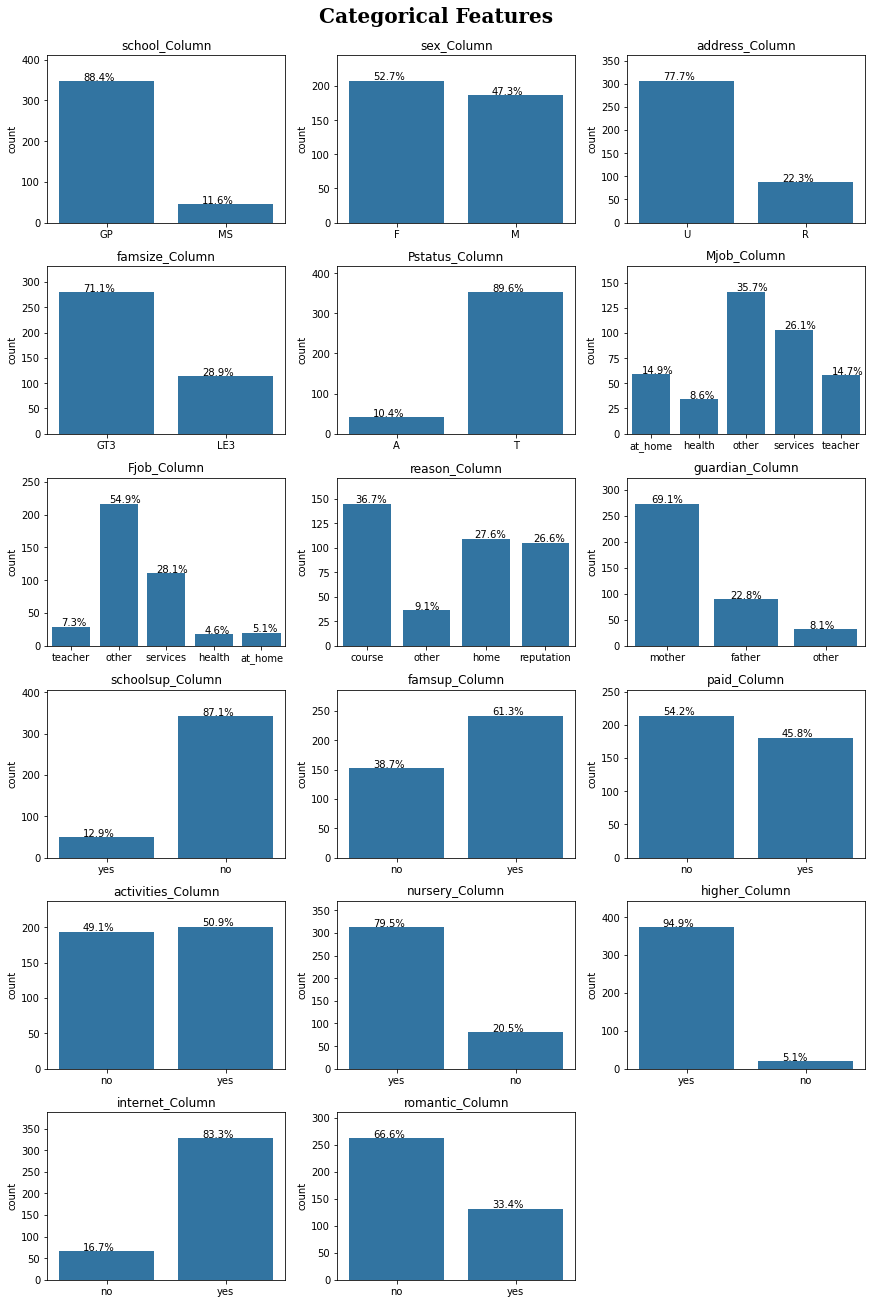

In [ ]:
bar_chart(df,categoricals,annot=True,title='Categorical Features')

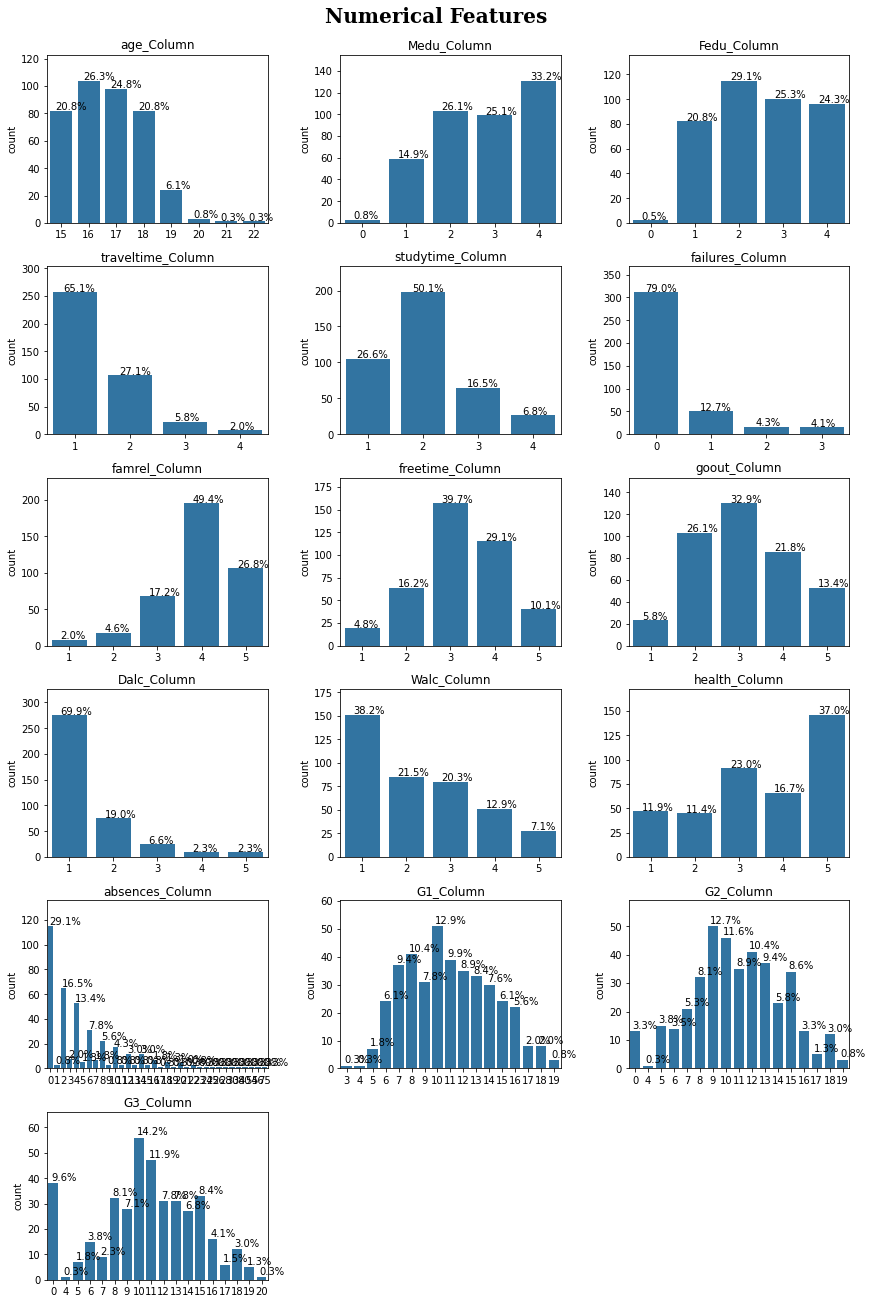

In [ ]:
bar_chart(df,numericals,annot=True,title='Numerical Features')

1.  Many students come from Gabriel Pereira's school
2.  There are more female students than male students.
3.  Most students live in the city
4.  Most students' parents are still together
5.  Parents' occupations are mostly `other`
6.  Reasons for choosing the school because of the curriculum
7.  Guardians are mostly mothers of students
8.  Students who participate in extra `paid` classes are almost equal in number to those who do not participate
9. Students who participate in extra-curricular `activities` are almost equal in number to those who do not participate
10. More students are willing to pursue higher studies
11. 1/3 of students have a girlfriend or boyfriend
12. <2% of students are 20 - 22 years old
13. 33.2% of students' mothers are university graduates
14. 29.1% of the students' fathers are junior high school graduates
15. Most students travel <15 minutes to school
16. Most students have study time of 2 - 5 hours/week
17. 79% of students have never failed an exam
18. 69.9% of students very rarely drink alcohol during the school day
19. 38.2% of students drink alcohol on holidays
19. 29.1% of students are never absent
20. About 23% of students have fairly poor health

## Boxplot to detect outliers

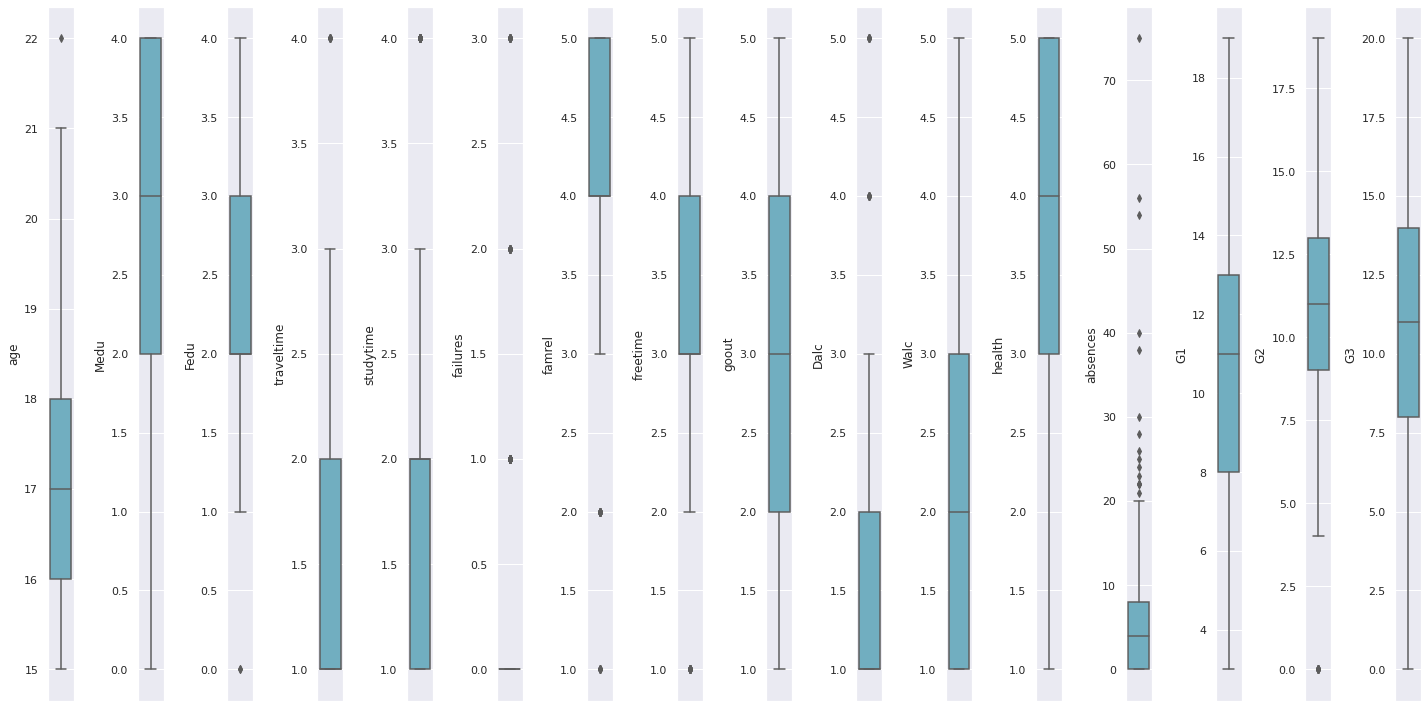

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(20,10))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='c')
    plt.tight_layout()

**tidak ada outlier** = `goout`, `Medu`, `Health`, `Walc`, `G1`, `G3`

**ada outlier** = `age`,	`Fedu`, `traveltime`,	`studytime`,	`failures`, `famrel`,	`freetime`,	`Dalc`,	`absences`,	`G2`

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [ ]:
detect_outliers(df,'age')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Grading
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,5,5,1,16,6,8,8,7.333333,weak


Umur 22 tahun terlalu tua untuk siswa SMA. row ini bisa di drop

In [ ]:
df.drop(df[df['age'] == 22].index, inplace = True)

In [ ]:
detect_outliers(df,'Fedu')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
171,GP,M,16,U,GT3,T,1,0,other,other,...,4,3,2,1,1,3,2,13,15,16


Untuk Father education 'none' mungkin memang benar dan tidak perlu dihapus

In [ ]:
detect_outliers(df,'absences')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Grading
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,1,2,3,25,7,10,11,9.333333,weak
74,GP,F,16,U,GT3,T,3,3,other,services,...,3,2,4,5,54,11,12,11,11.333333,sufficient
103,GP,F,15,U,GT3,T,3,2,services,other,...,5,1,1,2,26,7,6,6,6.333333,weak
183,GP,F,17,U,LE3,T,3,3,other,other,...,3,2,3,1,56,9,9,8,8.666667,weak
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,3,2,24,18,18,18,18.000000,excellent
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,3,3,4,5,28,10,9,9,9.333333,weak
216,GP,F,17,U,GT3,T,4,3,other,other,...,5,2,4,1,22,6,6,4,5.333333,weak
260,GP,F,18,U,GT3,T,4,3,services,other,...,2,1,3,2,21,17,18,18,17.666667,excellent
276,GP,F,18,R,GT3,A,3,2,other,services,...,1,1,1,5,75,10,9,9,9.333333,weak
277,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,1,4,3,22,9,9,9,9.000000,weak


untuk `absences` masih dalam batas wajar karena akumulasi absen selama SMA

In [ ]:
pd.set_option('max_columns', None)
detect_outliers(df,'failures')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
40,GP,F,16,U,LE3,T,2,2,other,other,home,mother,2,2,1,no,yes,no,yes,no,yes,yes,yes,3,3,3,1,2,3,25,7,10,11
44,GP,F,16,U,LE3,T,2,2,other,at_home,course,father,2,2,1,yes,no,no,yes,yes,yes,yes,no,4,3,3,2,2,5,14,10,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,14,6,5,5
387,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,0,7,5,0
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9


untuk `failures`, `traveltime`, `studytime`, `famrel`, `freetime`, `Dalc`, `G2` masih dalam batas wajar dan tidak perlu dihilangkan

# EDA

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


SMA dan universitas di Portugis menggunakan skala penilaian 20 poin. Kualifikasi setiap nilai sebagai berikut:
*   0 - 3.4 : Poor
*   3.5 - 9.4 : Weak
*   9.5 - 13.4 : Sufficient
*   13.5 - 15.4 : Good
*   15.5 - 17.4 : Very Good
*   17.5 - 20 : Excellent



In [ ]:
df['G_avg'] = df[['G1','G2','G3']].mean(axis=1)

In [ ]:
binning = [0, 3.5, 9.5, 13.5, 15.5, 17.5, 20]
levels = ['poor', 'weak', 'sufficient', 'good', 'very good', 'excellent']
df['Grading'] = pd.cut(df['G_avg'], bins=binning, labels=levels)

In [ ]:
df['pass_flag'] = df['G_avg'].apply(lambda x: 1 if x >= 9.5 else 0)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Grading,pass_flag
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,weak,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,weak,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,weak,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,good,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,weak,0


##Age vs Grade

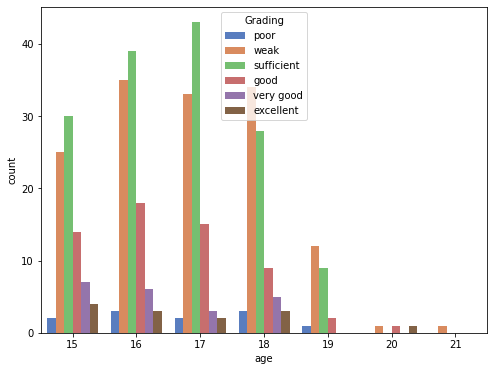

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='age', hue='Grading', data=df, palette='muted')
plt.show()

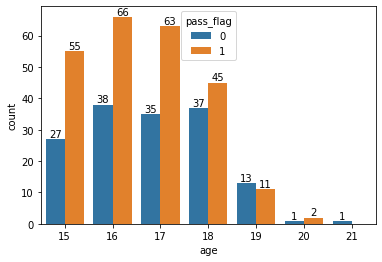

In [ ]:
ax = sns.countplot(x='age', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

From age of 18, there is a decrease in the number of students passing, which may be due to students experiencing difficulty in following the challenging lessons in Grade 3 of high school.

## Gender vs Grade

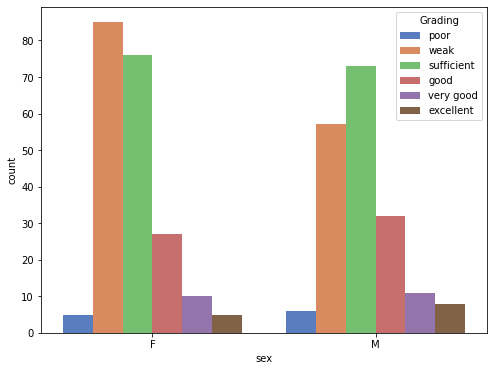

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='Grading', data=df, palette='muted')
plt.show()

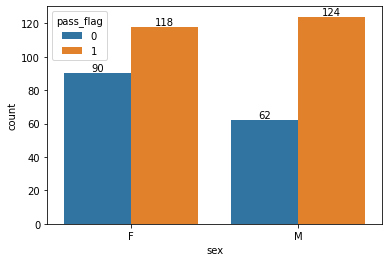

In [ ]:
ax = sns.countplot(x='sex', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Male students tend to have a slightly higher rate of passing exams compared to female students. However, the difference in the rate of passing exams between male and female students is not particularly significant.

##Address vs Grade

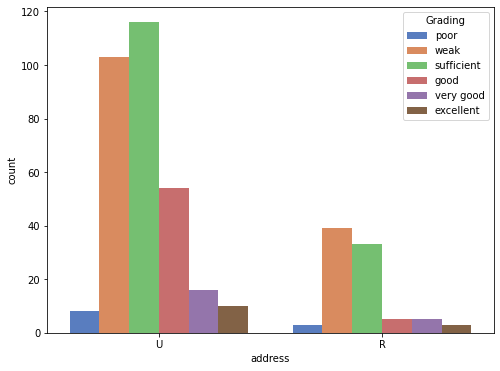

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='address', hue='Grading', data=df, palette='muted')
plt.show()

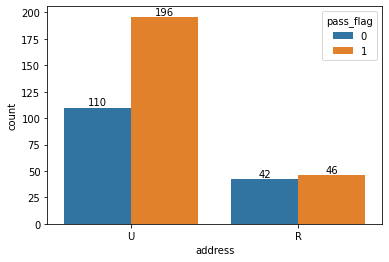

In [ ]:
ax = sns.countplot(x='address', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who live in cities tend to have higher scores and pass the exam more than students who live in rural areas because they have better access to education and facilities.

##Famsize vs Grade

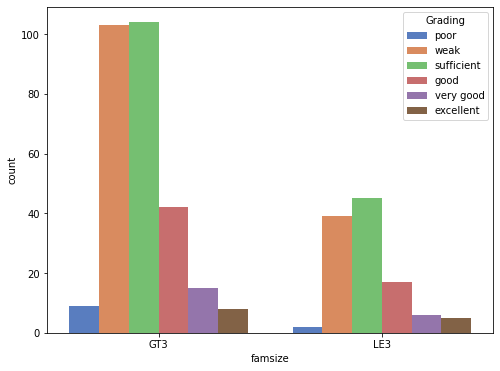

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='famsize', hue='Grading', data=df, palette='muted')
plt.show()

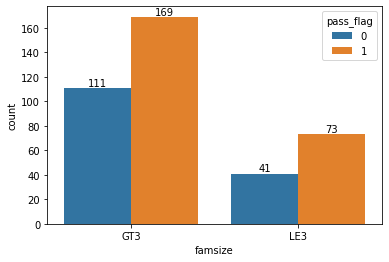

In [ ]:
ax = sns.countplot(x='famsize', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Banyak siswa yang anggota keluarganya anggota keluarganya > 3 orang nilainya cenderung cukup atau kurang baik

##Parents Status vs Grade

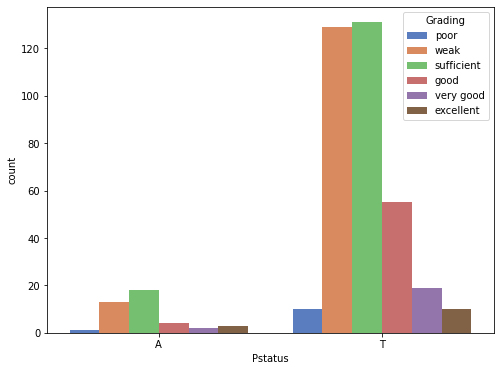

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pstatus', hue='Grading', data=df, palette='muted')
plt.show()

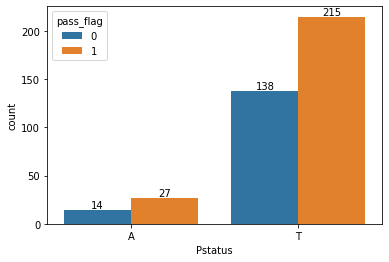

In [ ]:
ax = sns.countplot(x='Pstatus', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students whose parents live together tend to have higher scores and pass the exam more than students whose parents live apart. This may be because living together provides a more stable and supportive home environment that can help students succeed in school.

##Mother & Father Edu  vs Grade

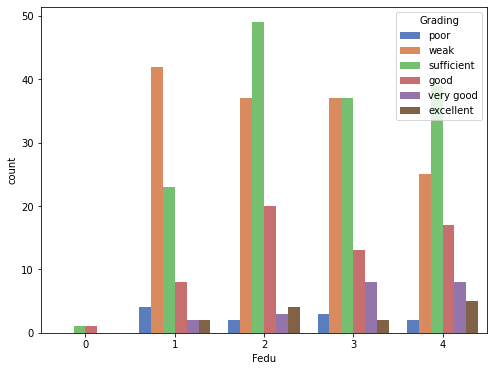

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Fedu', hue='Grading', data=df, palette='muted')
plt.show()

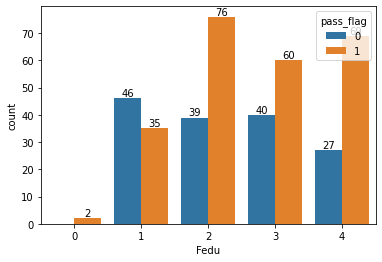

In [ ]:
ax = sns.countplot(x='Fedu', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

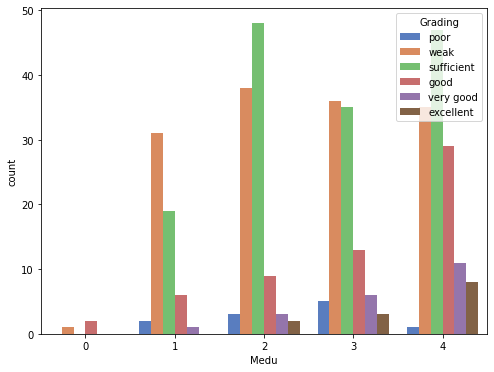

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Medu', hue='Grading', data=df, palette='muted')
plt.show()

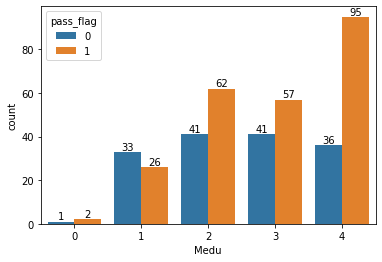

In [ ]:
ax = sns.countplot(x='Medu', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students whose parents graduated from elementary and higher tend to pass the exams because their parents may be more likely to value education and provide their children with guidance and support in their studies.

##Mother & Father Job vs Grade

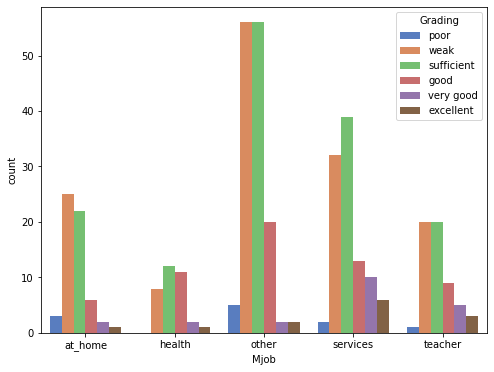

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Mjob', hue='Grading', data=df, palette='muted')
plt.show()

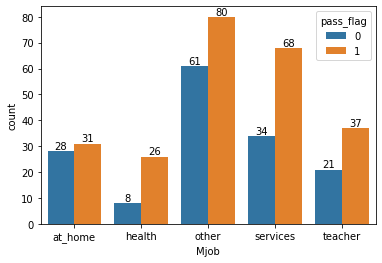

In [ ]:
ax = sns.countplot(x='Mjob', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

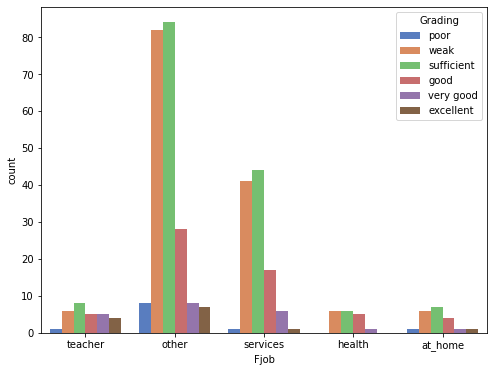

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Fjob', hue='Grading', data=df, palette='muted')
plt.show()

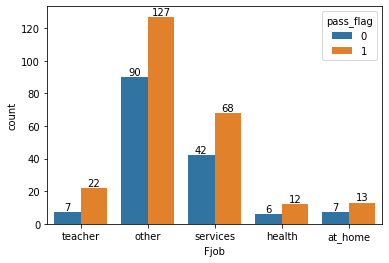

In [ ]:
ax = sns.countplot(x='Fjob', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students whose parents' jobs are other tend to pass the exams than students whose parents' jobs are teachers.

##Reason to choose school vs Grade

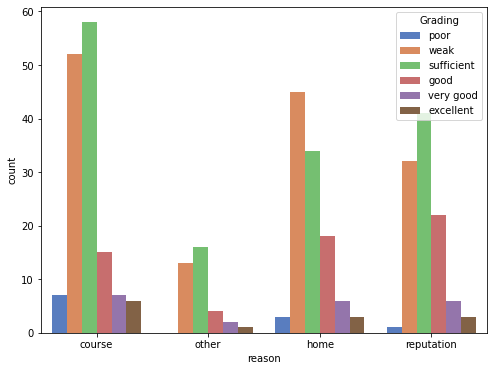

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='reason', hue='Grading', data=df, palette='muted')

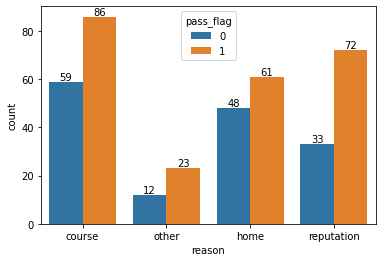

In [ ]:
ax = sns.countplot(x='reason', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who choose schools based on courses usually have strong motivation and interest in that field, so they are more interested in learning and more focused on following the lessons. In addition, schools that offer certain courses usually also have better learning facilities and resources than other schools

##Guardian vs Grade

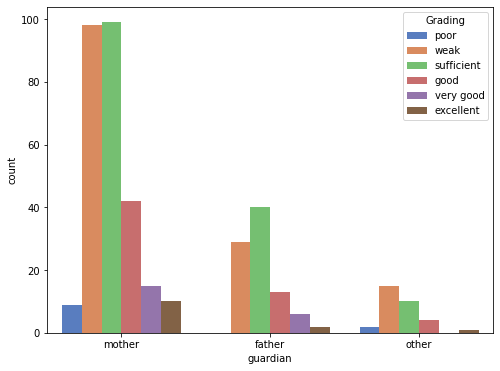

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='guardian', hue='Grading', data=df, palette='muted')

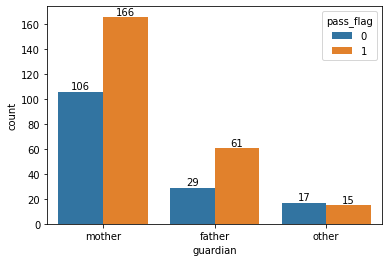

In [ ]:
ax = sns.countplot(x='guardian', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students whose mothers are guardians tend to have better grades. When a mother is responsible for taking care of her children, she may be more involved in their lives and more invested in their academic success.

##Travel Time vs Grade

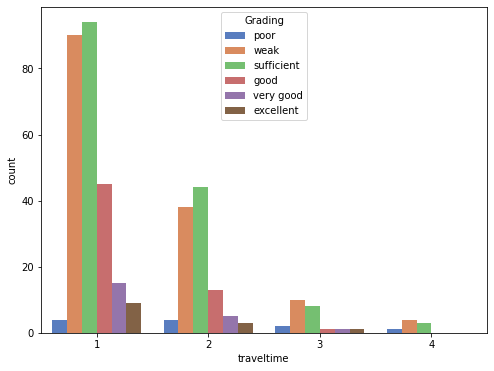

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='traveltime', hue='Grading', data=df, palette='muted')

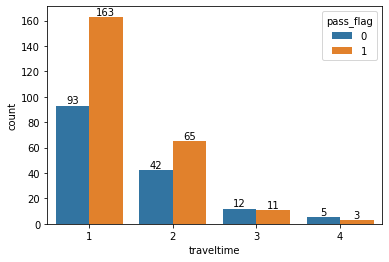

In [ ]:
ax = sns.countplot(x='traveltime', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who live near their schools may be more likely to achieve good grades and pass their exams because they do not have to spend a lot of time and energy commuting. This can allow them to have more time and energy for studying and other activities that support their academic success.

##Study Time vs Grade

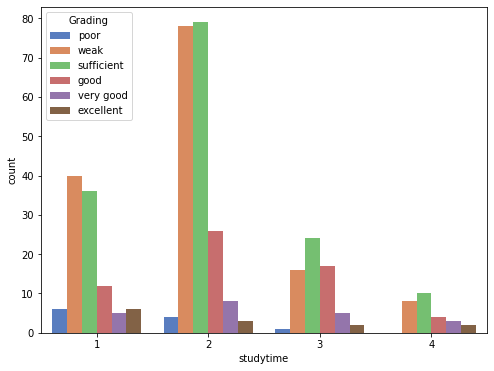

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='studytime', hue='Grading', data=df, palette='muted')

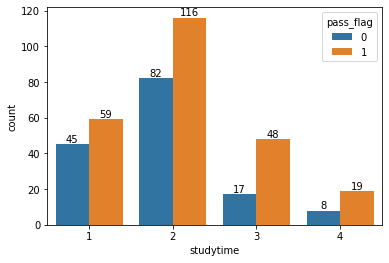

In [ ]:
ax = sns.countplot(x='studytime', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

The success or failure of an exam does not depend solely on the amount of time spent studying, but also on the student's concentration while studying. Students who are able to concentrate effectively during their study time may be able to learn and retain more information, which can improve their chances of passing exams.

##Failures vs Grade

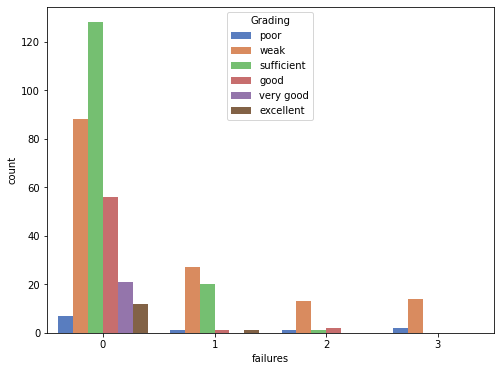

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='failures', hue='Grading', data=df, palette='muted')

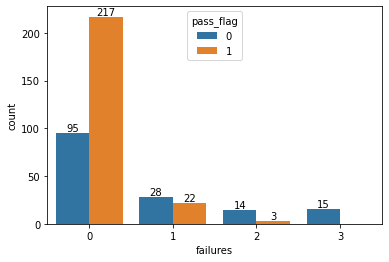

In [ ]:
ax = sns.countplot(x='failures', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who never fail tend to have better grades. Students who never fail may also have better study habits and more effective learning strategies

##School and Family Support vs Grade

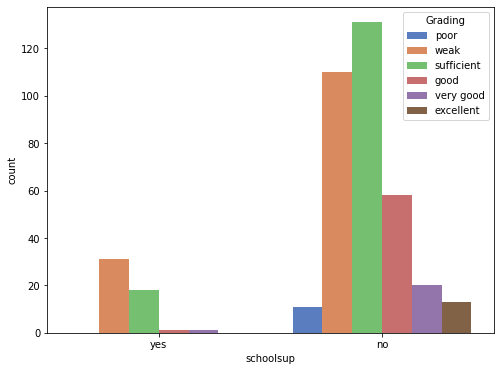

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='schoolsup', hue='Grading', data=df, palette='muted')
plt.show()

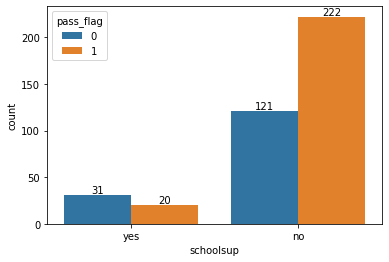

In [ ]:
ax = sns.countplot(x='schoolsup', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who do not get school support tend to have better grades.

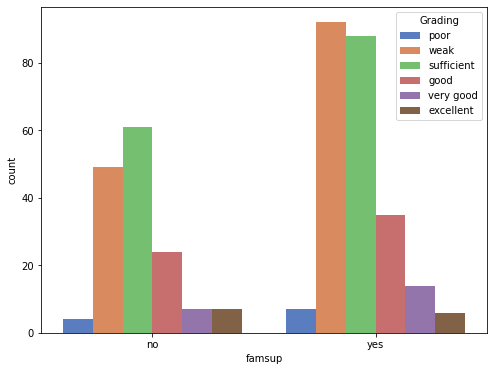

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='famsup', hue='Grading', data=df, palette='muted')
plt.show()

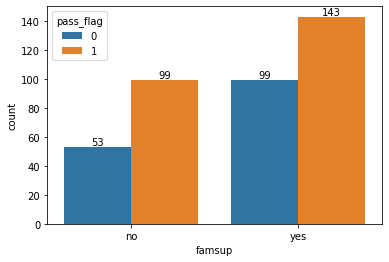

In [ ]:
ax = sns.countplot(x='famsup', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

The difference in the number of students who receive and do not receive family support is not particularly significant.

##Paid Classes vs Grade

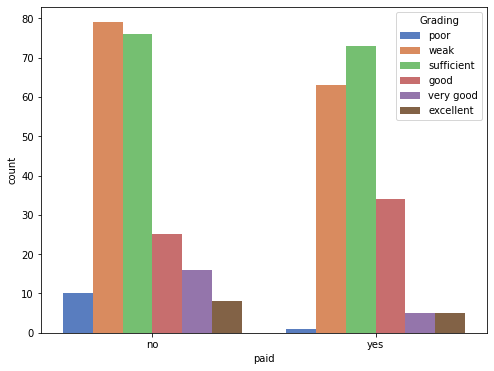

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='paid', hue='Grading', data=df, palette='muted')

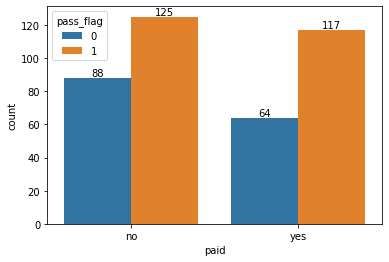

In [ ]:
ax = sns.countplot(x='paid', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

The difference in the number of students who pay for extra classes and those who do not join is not particularly significant.

##Excul vs Grade

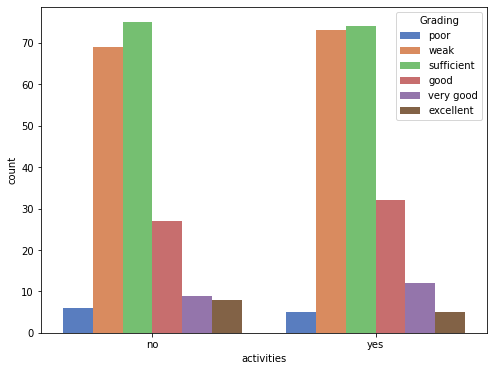

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='activities', hue='Grading', data=df, palette='muted')

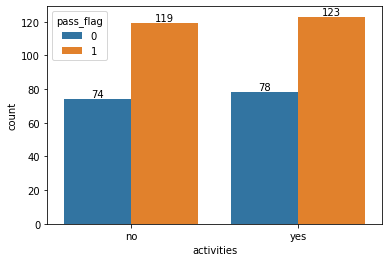

In [ ]:
ax = sns.countplot(x='activities', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

The difference in the number of students who participate in extracurricular activities is not particularly significant.

##Nursery vs Grade

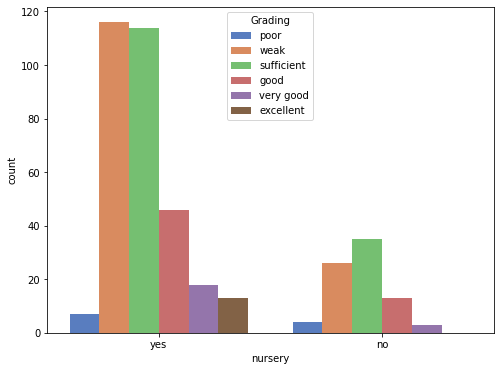

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='nursery', hue='Grading', data=df, palette='muted')

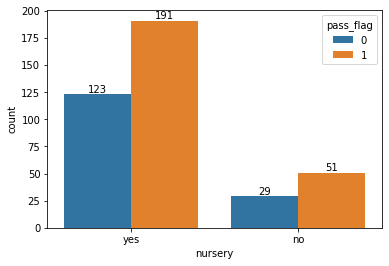

In [ ]:
ax = sns.countplot(x='nursery', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who attended nursery school tend to have better grades. It means early education is important to develop cognitive, social, and emotional skills that can support their academic achievements.

##Pursue higher edu vs Grade

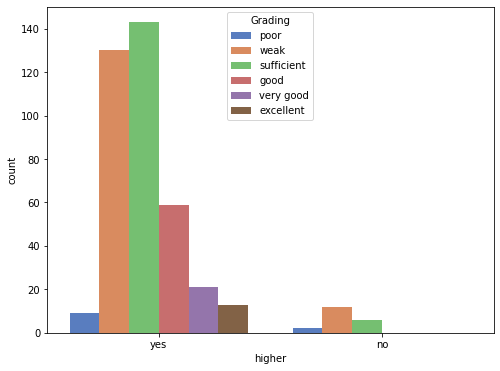

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='higher', hue='Grading', data=df, palette='muted')

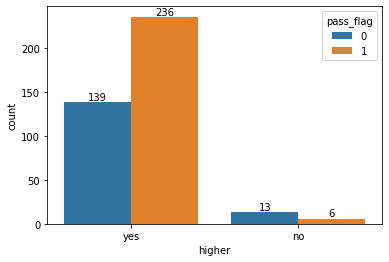

In [ ]:
ax = sns.countplot(x='higher', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who are interested in pursuing higher education tend to have better grades than those who are not interested, because they are more motivated to succeed and more determined to achieve their academic goals.

##Internet at home vs Grade

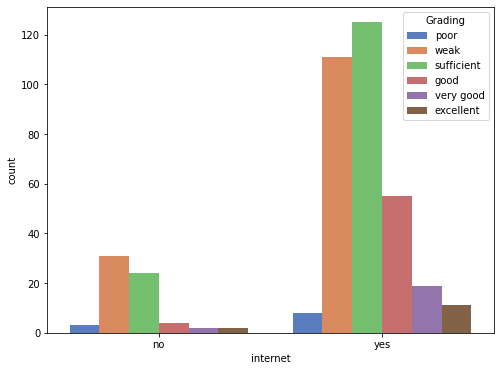

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='internet', hue='Grading', data=df, palette='muted')

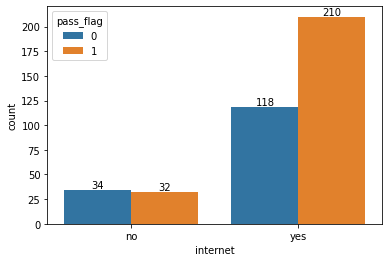

In [ ]:
ax = sns.countplot(x='internet', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who have internet connection at their home tend to have better grades.

##Romantic Partner vs Grade

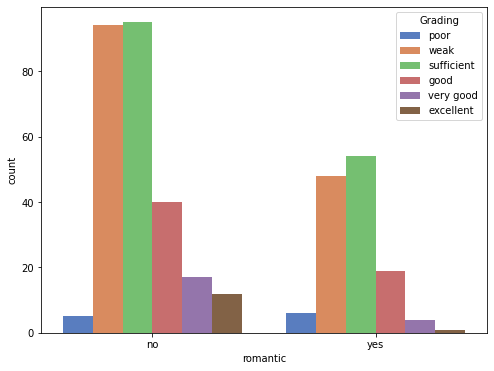

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='romantic', hue='Grading', data=df, palette='muted')

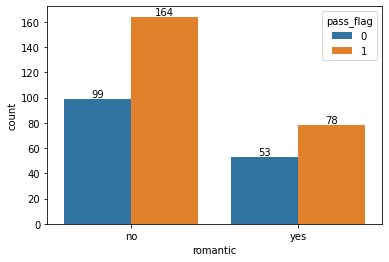

In [ ]:
ax = sns.countplot(x='romantic', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who do not have partners tend to have better grades and mostly pass the exams.

##Family Relationship vs Grade

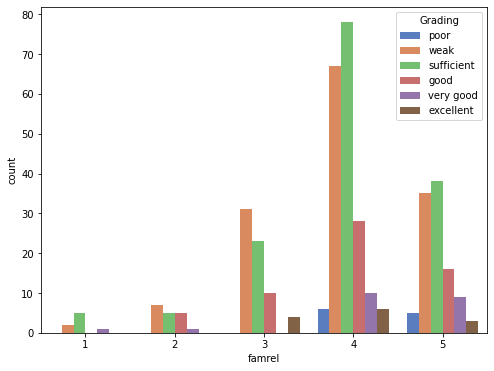

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='famrel', hue='Grading', data=df, palette='muted')

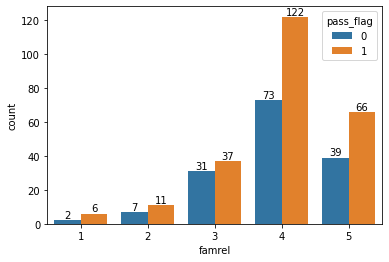

In [ ]:
ax = sns.countplot(x='famrel', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Siswa yang memiliki hubungan baik dengan keluarganya cenderung memiliki nilai yang bagus

##Free time vs Grade

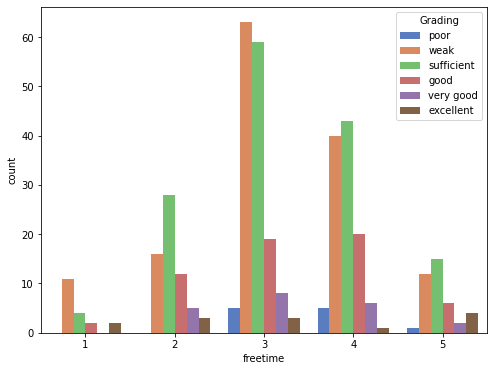

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='freetime', hue='Grading', data=df, palette='muted')

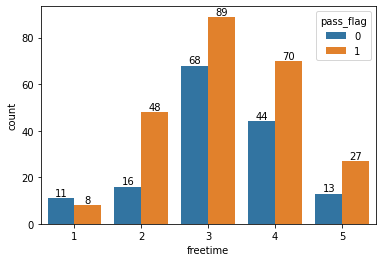

In [ ]:
ax = sns.countplot(x='freetime', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who have sufficient free time tend to get good grades and pass their exams because they may be better able to balance their academic and personal lives

##Go out vs Grade

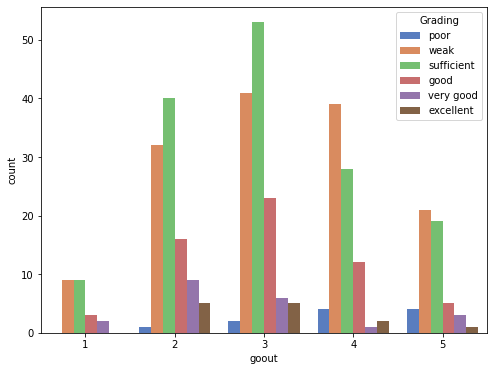

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='goout', hue='Grading', data=df, palette='muted')

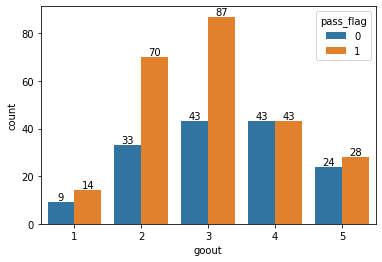

In [ ]:
ax = sns.countplot(x='goout', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who have sufficient time to have fun with their friends tend to get good grades and pass their exams because they may be better able to balance their academic and personal lives

##Alcohol Consumption vs Grade

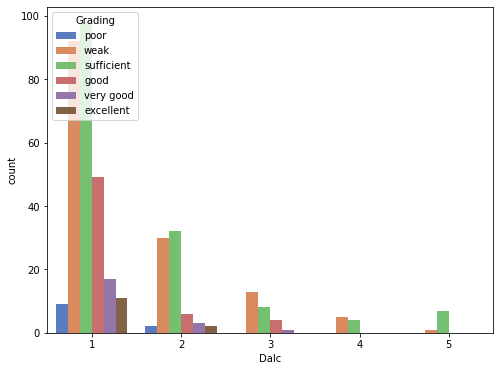

In [ ]:
#Weekday Alcohol Consumption
plt.figure(figsize=(8,6))
sns.countplot(x='Dalc', hue='Grading', data=df, palette='muted')
plt.show()

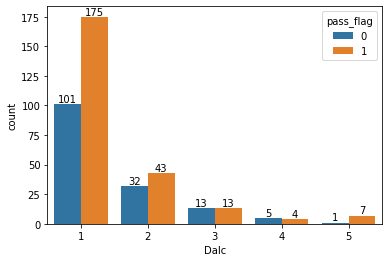

In [ ]:
ax = sns.countplot(x='Dalc', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

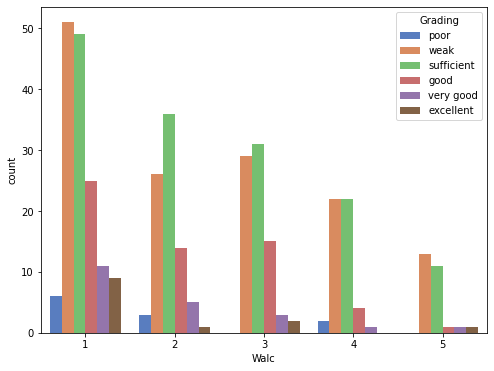

In [ ]:
#Weekend Alcohol Consumption
plt.figure(figsize=(8,6))
sns.countplot(x='Walc', hue='Grading', data=df, palette='muted')
plt.show()

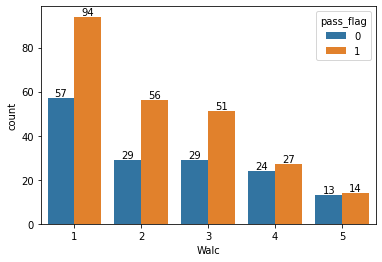

In [ ]:
ax = sns.countplot(x='Walc', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who rarely drink alcohol during the weekdays tend to get good grades, while their grades may be lower during holidays when they are more likely to drink alcohol. Therefore, avoiding or lessening alcohol during the weekend can help students to  concentrate and absorb and retain information better.

##Health vs Grade

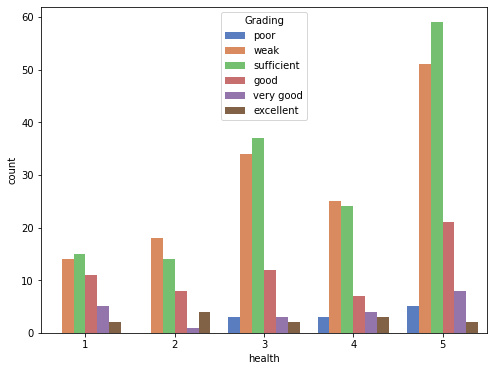

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='health', hue='Grading', data=df, palette='muted')

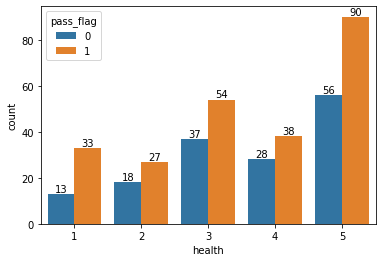

In [ ]:
ax = sns.countplot(x='health', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who are healhier tend to have better grades and pass the exams.

##Absences vs Grade

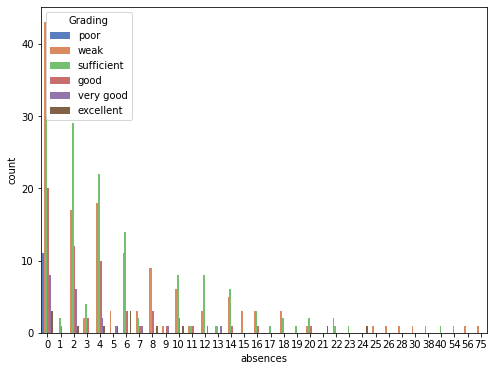

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='absences', hue='Grading', data=df, palette='muted')

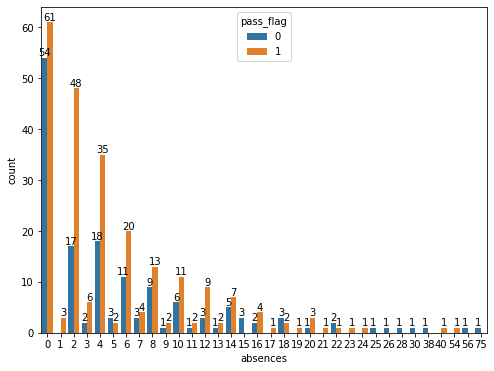

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='absences', hue='pass_flag', data=df)
for container in ax.containers:
    ax.bar_label(container)

Students who rarely absent tend to have better grades and pass the exams.

#EDA Conclusion

* Male students have a slightly higher grade point average 
than females
* Students who live in cities score higher than students who live in rural areas because access to education and facilities is better in cities.
* Students whose parents live together have higher grade point averages than students whose parents do not live together
* Students whose mothers are university graduates score better. This is because mothers take the time and can teach their children.
* More students live near the school and tend to get good grades.
* Students who never repeat a grade tend to have better grades
* More students with support from family get more than fair - excellent grades
* Students who attend kindergarten tend to have better grades. This suggests early education is good for child development
* Students who wanted to pursue higher education had better grades than those who were not interested. This shows that self-motivation affects grades.
* Students who have internet at home get better grades.
* Students who have a good relationship with their family tend to have good grades
* More healthy students scored fair - very good than those who were unhealthy.


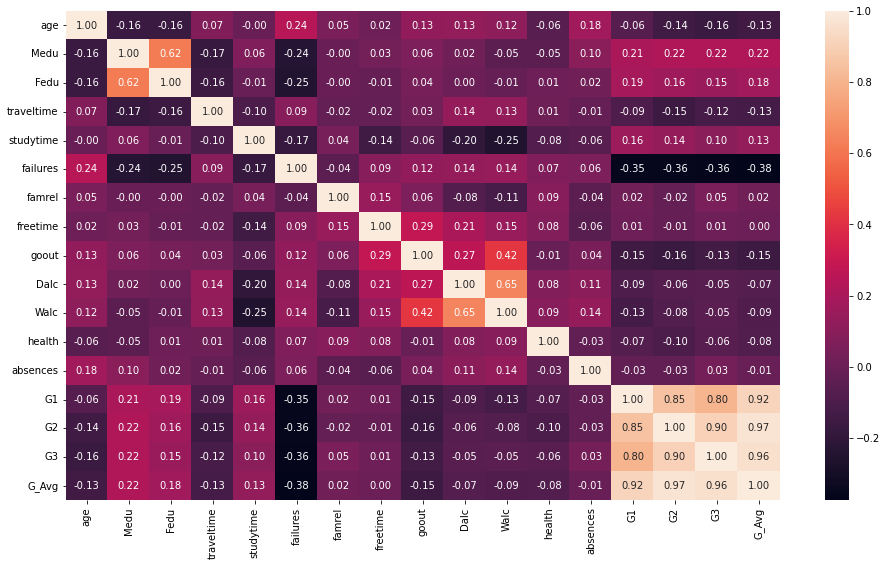

In [ ]:
# correlation heatmap
plt.figure(figsize = (16,9))
correlation = df.corr()
sns.heatmap(correlation, annot=True,  fmt='.2f')

Based on the heatmap, it can be seen that: 
* `Mother Education` and `Father Education` have positive correlation with G_avg, indicating that parental education has an impact on a students' grades. 
* `failures` variable has a strong negative correlation with G_avg, indicating that the number of failures in exams has impact on a students' grades. 
* `Walc` and `goout` variables also have a relatively high correlation, indicating that time spent socializing on weekend may also consuming alcohol.
* A strong correlation is also seen between the `G1`, `G2`, and `G3` variables, indicating that these values are highly correlated with each other. This shows that these variables have a strong impact on each other, and that a change in the value of one variable will have a strong impact on the other values.

#Data Preprocessing

In [ ]:
categoricals_ordinal = ['famsize', 'Medu',	'Fedu', 'failures','health','Dalc','Walc','goout','freetime','famrel']
categoricals_nominal = ['school',	'sex', 'address','Pstatus', 'Mjob',	'Fjob',	'reason',	'guardian', 'schoolsup',	'famsup',	'paid',	'activities',	'nursery',	'higher',	'internet',	'romantic']
numericals = ['age', 'traveltime','studytime','absences']
target = ['G_avg']

In [ ]:
# Onehot Encoding get dummies
onehot_columns = categoricals_nominal
df = pd.get_dummies(df, columns = onehot_columns)

In [ ]:
famsize_dict = {
    'GT3' : 1,
    'LE3' : 0
}
df['famsize'] = df['famsize'].map(famsize_dict)

In [ ]:
pd.set_option('max_columns', None)
df.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_avg,Grading,school_GP,school_MS,sex_F,sex_M,address_R,address_U,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,1,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,5.666667,weak,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,5.333333,weak,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,0,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,8.333333,weak,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,1,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,14.666667,good,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,1,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,8.666667,weak,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [ ]:
df.drop(['G1','G2','G3','Grading'], axis="columns", inplace=True)

###Split Data

In [ ]:
df['pass_flag'] = df['G_avg'].apply(lambda x: 1 if x >= 9.5 else 0)
df

,age,famsize,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,pass_flag
0,18,1,4,4,2,2,0,4,3,4,...,0,0,1,0,1,1,0,1,0,0
1,17,1,1,1,1,2,0,5,3,3,...,0,1,0,0,1,0,1,1,0,0
2,15,0,1,1,1,2,3,4,3,2,...,0,0,1,0,1,0,1,1,0,0
3,15,1,4,2,1,3,0,3,2,2,...,1,0,1,0,1,0,1,0,1,1
4,16,1,3,3,1,2,0,4,3,2,...,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,0,2,2,1,2,2,5,5,4,...,0,0,1,0,1,1,0,1,0,0
391,17,0,3,1,2,1,0,2,4,5,...,0,1,0,0,1,0,1,1,0,1
392,21,1,1,1,1,1,3,5,5,3,...,0,1,0,0,1,1,0,1,0,0
393,18,0,3,2,3,1,0,4,4,1,...,0,1,0,0,1,0,1,1,0,1


In [ ]:
df.pass_flag.value_counts(normalize=True)

1    0.614213
0    0.385787
Name: pass_flag, dtype: float64

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['G_avg','pass_flag'])
y = df[['pass_flag']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Machine Learning

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def evaluate(model, x_test = X_test, y_test = y_test):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

In [ ]:
rf_model = RandomForestClassifier() #(random_state = 1, n_jobs = -1)
rf_model.fit(X_train, y_train)
evaluate(rf_model)

Accuracy: 0.6582278481012658
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.66      0.87      0.75        47

    accuracy                           0.66        79
   macro avg       0.65      0.61      0.60        79
weighted avg       0.66      0.66      0.63        79

------
Assuming 1 as positive, we get:

True Positive: 41
True Negative: 11
False Positive: 21
False Negative: 6

Precision: 0.6612903225806451
Recall: 0.8723404255319149
F1-Score: 0.7522935779816514


              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.72      0.87      0.79        47

    accuracy                           0.72        79
   macro avg       0.72      0.69      0.69        79
weighted avg       0.72      0.72      0.71        79

[[16 16]
 [ 6 41]]


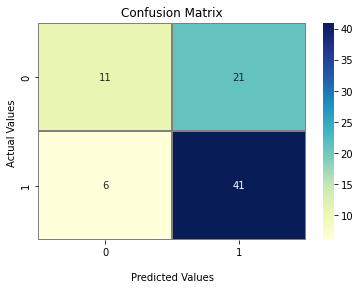

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
y_pred=rf_model.predict(X_test)
ax = sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt="d",cmap='YlGnBu',linewidths=1,linecolor='Grey')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

###Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
evaluate(logreg)

Accuracy: 0.6329113924050633
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.57      0.41      0.47        32
           1       0.66      0.79      0.72        47

    accuracy                           0.63        79
   macro avg       0.61      0.60      0.60        79
weighted avg       0.62      0.63      0.62        79

------
Assuming 1 as positive, we get:

True Positive: 37
True Negative: 13
False Positive: 19
False Negative: 10

Precision: 0.6607142857142857
Recall: 0.7872340425531915
F1-Score: 0.7184466019417476


              precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.66      0.87      0.75        47

    accuracy                           0.66        79
   macro avg       0.65      0.61      0.60        79
weighted avg       0.66      0.66      0.63        79

[[11 21]
 [ 6 41]]


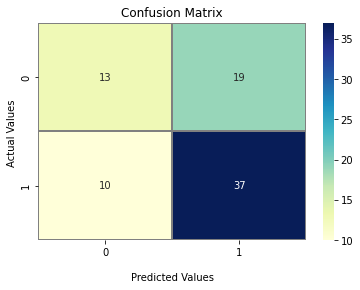

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
y_pred=logreg.predict(X_test)
ax = sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt="d",cmap='YlGnBu',linewidths=1,linecolor='Grey')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

###Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate(dt)

Accuracy: 0.7341772151898734
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.76      0.81      0.78        47

    accuracy                           0.73        79
   macro avg       0.72      0.72      0.72        79
weighted avg       0.73      0.73      0.73        79

------
Assuming 1 as positive, we get:

True Positive: 38
True Negative: 20
False Positive: 12
False Negative: 9

Precision: 0.76
Recall: 0.8085106382978723
F1-Score: 0.7835051546391754


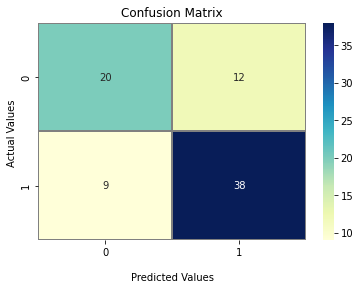

In [ ]:
import seaborn as sns
y_pred=dt.predict(X_test)
ax = sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt="d",cmap='YlGnBu',linewidths=1,linecolor='Grey')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

###XGBoost

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
clf

XGBClassifier(max_depth=10, n_estimators=500)

In [ ]:
#Creating the model on Training Data
XGB = clf.fit(X_train,y_train)
y_pred=XGB.predict(X_test)

In [ ]:
Predictors=X.columns

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.72      0.87      0.79        47

    accuracy                           0.72        79
   macro avg       0.72      0.69      0.69        79
weighted avg       0.72      0.72      0.71        79

[[16 16]
 [ 6 41]]


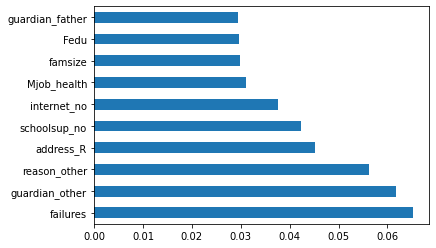

In [ ]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
 
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
evaluate(XGB)

Accuracy: 0.7215189873417721
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.72      0.87      0.79        47

    accuracy                           0.72        79
   macro avg       0.72      0.69      0.69        79
weighted avg       0.72      0.72      0.71        79

------
Assuming 1 as positive, we get:

True Positive: 41
True Negative: 16
False Positive: 16
False Negative: 6

Precision: 0.7192982456140351
Recall: 0.8723404255319149
F1-Score: 0.7884615384615385


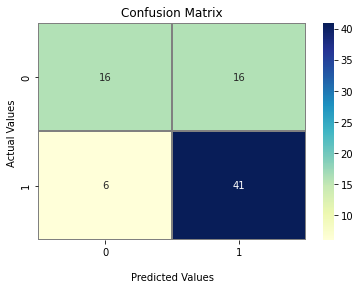

In [ ]:
import seaborn as sns

ax = sns.heatmap((confusion_matrix(y_test, y_pred)), annot=True, fmt="d",cmap='YlGnBu',linewidths=1,linecolor='Grey')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

#Conclusion and Recommendation

**Conclusion**
* Age, parents educations, parents jobs, travel time, failures, parents 
relationship, address, reason to choose school, guardian, nursery,  pursue higher education, internet, romantic, free time, go out,  weekdays and weekend alcohol consumption, health, absences may significantly impact students' performance on exam
* Study time, gender, family support, school support, paid extra classes, and extracurricular activities may not significantly impact students' performance on exam
* Random Forest and XGBoost are able to correctly identify 87% of the students who did not pass their exams

**Recommendation**

This machine learning model can be used to identify students who are at risk of failing an exam, based on their performance on a pretest. By using the model to predict which students are likely to fail, teachers can provide additional support and assistance to these students in order to help them improve their scores and increase their chances of success on the actual exam. By doing this, teachers can help to reduce the number of students who might fail the exam